In [11]:
import pandas as pd
import sklearn.preprocessing as pp
import sklearn.model_selection as ms
import random
import sklearn.linear_model as lm
import sklearn.neighbors as nn
import sklearn.svm as svm
import pickle
import sklearn.ensemble as rf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

random.seed(0)

In [5]:
df = pd.read_csv('data/churn/churn_clean.csv', delimiter=',')
y = df.Exited
x = df.drop(["Exited"], axis=1)

In [6]:
scaler = pp.RobustScaler()
scaler.fit(x.values)
x = scaler.transform(x.values)

In [7]:
xtrain, xtest, ytrain, ytest = ms.train_test_split(x, y, train_size=0.8, test_size=0.2)
print(xtrain.shape, xtest.shape)

(1297, 12) (325, 12)


In [8]:
model = lm.LinearRegression()
model.fit(xtrain, ytrain)
print(f"Score: {model.score(xtest, ytest)}")

Score: 0.2074971158215505


In [9]:
model = nn.KNeighborsClassifier()
model.fit(xtrain, ytrain)
print(f"Score: {model.score(xtest, ytest)}")
with open("data/churn/churn_knn.pickle", "wb") as f:
    pickle.dump((scaler, model), f)

Score: 0.6984615384615385


In [10]:
model = svm.SVC()
model.fit(xtrain, ytrain)
print(f"Score: {model.score(xtest, ytest)}")

Score: 0.6892307692307692


In [12]:
model = rf.RandomForestClassifier()
model.fit(xtrain, ytrain)
print(f"Score: {model.score(xtest, ytest)}")
with open("data/churn/churn_rf.pickle", "wb") as f:
    pickle.dump((scaler, model), f)

Score: 0.7384615384615385


In [14]:
ypred = model.predict(xtest)
print(classification_report(ytest,  ypred))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       175
           1       0.73      0.68      0.71       150

    accuracy                           0.74       325
   macro avg       0.74      0.73      0.74       325
weighted avg       0.74      0.74      0.74       325



[0.10024549 0.18347035 0.04899348 0.0770279  0.10748139 0.09383484
 0.07283529 0.09113244 0.14690201 0.01462598 0.040218   0.02323283]


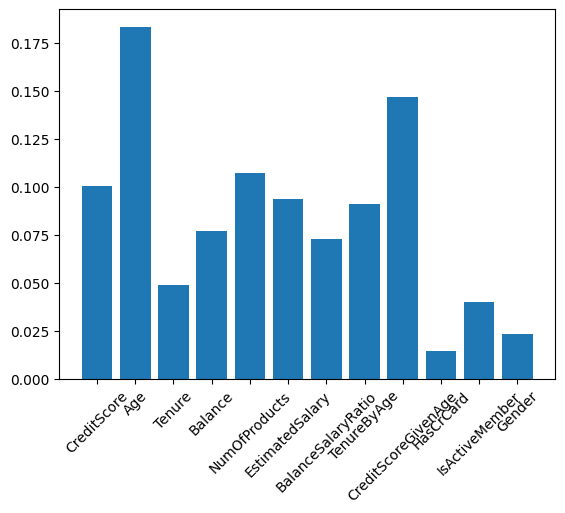

In [15]:
print(model.feature_importances_)
plt.bar(df.columns[1:], model.feature_importances_)
plt.xticks(rotation=45)
plt.show()

In [16]:
from sklearn.tree import export_graphviz
export_graphviz(model.estimators_[0],
                 out_file='data/churn/churn.dot',
                 feature_names = df.columns[1:],
                 class_names = ["0", "1"],
                 rounded = True, proportion = False,
                 precision = 2, filled = True)

In [19]:
import sklearn.neural_network as nn
model = nn.MLPClassifier(hidden_layer_sizes=(15,15,15,15))
model.fit(xtrain, ytrain)
print(f"Score: {model.score(xtest, ytest)}")

ypred = model.predict(xtest)
print(classification_report(ytest,  ypred))

with open("data/churn/churn_mlp.pickle", "wb") as f:
    pickle.dump((scaler, model), f)

Score: 0.7446153846153846
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       175
           1       0.74      0.69      0.71       150

    accuracy                           0.74       325
   macro avg       0.74      0.74      0.74       325
weighted avg       0.74      0.74      0.74       325



C:\Users\conta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
